In [15]:
!pip install --upgrade git+https://github.com/google/lightweight_mmm.git

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  Cloning https://github.com/google/lightweight_mmm.git to /private/var/folders/hy/t458q555473c8179xsfn68fw0000gn/T/pip-req-build-jfgxcpdj
  error: subprocess-exited-with-error
  
  × git version did not run successfully.
  │ exit code: 1
  ╰─> [2 lines of output]
      xcrun: error: invalid active developer path (/Library/Developer/CommandLineTools), missing xcrun at: /Library/Developer/CommandLineTools/usr/bin/xcrun
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: subprocess-exited-with-error

× git version did not run successfully.
│ exit code: 1
╰─> See above for output.

note: This error originates from a subprocess, and is likely not a problem with pip.


In [18]:
import jax.numpy as jnp
import numpyro
import pandas as pd
import numpy as np

AttributeError: partially initialized module 'jax' has no attribute 'version' (most likely due to a circular import)

In [19]:
from lightweight_mmm import lightweight_mmm
from lightweight_mmm import optimize_media
from lightweight_mmm import plot
from lightweight_mmm import utils

ModuleNotFoundError: No module named 'lightweight_mmm'

In [3]:
media_sales = pd.read_csv("merged_media_conversion_spend&users.csv")

In [4]:
media_sales.head()

,dates,brand,total_users_reached,total_cost,sponsored_products_s,sponsored_products_u,sponsored_brands_s,sponsored_brands_u,video_s,video_u,OTT_s,OTT_u,sponsored_display_s,sponsored_display_u,display_s,display_u,sales,converted_users
0,2022-09-02,Brand C,1396015,22956.80920,0.00,0,0.0,0,550.65473,42781,16190.4053,347938,0.0,0,6215.74917,1005296,4509.52,1501
1,2022-09-02,Brand G,1721941,18708.77882,6656.23,2944,0.0,0,0.00000,0,3256.1643,128440,0.0,0,8796.38452,1590557,15706.65,1905
2,2022-09-02,Brand LA,531396,3424.46448,0.00,0,0.0,0,173.85862,17612,0.0000,0,0.0,0,3250.60586,513784,607.42,248
3,2022-09-02,Brand LO,4422994,39091.98919,20499.98,11060,0.0,0,0.00000,0,0.0000,0,0.0,0,18592.00919,4411934,45236.85,5464
4,2022-09-02,Brand M,1990735,27193.26779,16769.30,13675,0.0,0,0.00000,0,0.0000,0,0.0,0,10423.96779,1977060,21105.52,4357


In [8]:
all_brands = media_sales.groupby("dates").sum()
all_brands.head()
all_brands.to_csv("media_sales_all.csv", index = False)

C:\Users\User\AppData\Local\Temp\ipykernel_17876\73581507.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_brands = media_sales.groupby("dates").sum()


In [14]:
#initialize variables for model
media_data = all_brands[["sponsored_products_u", "sponsored_brands_u", "video_u", "OTT_u", "sponsored_display_u", "display_u"]].values
media_data

array([[   36620,        0,    60393,   476378,       12, 10565316],
       [   40627,        0,    65204,   459897,       16, 11046479],
       [   42325,        0,    68390,   552470,       11, 11426469],
       ...,
       [   31864,    73056,    47522,   722152,        3,  8303878],
       [   32116,    73229,    58807,   722685,        5,  8243871],
       [   29531,    69678,    72065,   589362,        0,  8205193]],
      dtype=int64)

In [13]:
target = all_brands["sales"].values
target

array([ 108413.18,  201897.19,  203117.96,  228660.98,  230372.06,
        222634.89,  215529.27,  221514.28,  221791.93,  232952.24,
        233843.49,  226643.8 ,  222519.19,  223152.25,  233634.84,
        233327.99,  251661.23,  239766.02,  244609.75,  258341.74,
        241311.16,  233681.93,  219361.85,  242500.69,  246811.76,
        238095.65,  228104.2 ,  220691.88,  231719.74,  233311.17,
        266747.03,  267017.28,  263547.09,  259224.35,  244367.92,
        246356.72,  240327.49,  260807.76,  261926.45,  350070.09,
        375569.16,  311575.55,  248481.21,  242229.08,  272598.71,
        287285.89,  293749.34,  295600.5 ,  288246.82,  289228.81,
        275532.05,  321464.06,  348876.14,  348415.28,  455306.35,
        400087.18,  340130.74,  317300.36,  336959.89,  337108.41,
        368009.6 ,  391716.71,  387789.14,  365289.37,  343942.3 ,
        386403.56,  375993.32,  352362.5 ,  356842.38,  349169.63,
        351910.8 ,  327378.82,  352964.12,  362853.11,  358245

In [18]:
sponsored_products_c = all_brands['sponsored_products_s'].sum() / all_brands['sponsored_products_u'].sum()
sponsored_brands_c = all_brands['sponsored_brands_s'].sum() / all_brands['sponsored_brands_u'].sum()
video_c = all_brands['video_s'].sum() / all_brands['video_u'].sum()
OTT_c = all_brands['OTT_s'].sum() / all_brands['OTT_u'].sum()
sponsored_display_c = all_brands['sponsored_display_s'].sum() / all_brands['sponsored_display_u'].sum()
display_c = all_brands['display_s'].sum() / all_brands['display_u'].sum()

In [25]:
costs = np.array([sponsored_products_c, sponsored_brands_c, video_c, OTT_c, sponsored_display_c, display_c])

array([1.57393538, 0.18587341, 0.02596883, 0.03226239, 2.13547829,
       0.00790569])

In [31]:
#split data
data_size = media_data.shape[0]
split_point = data_size - 60
media_data_train = media_data[:split_point, ...]
media_data_test = media_data[split_point:, ...]
target_train = target[:split_point]
target_test = target[split_point:]

In [32]:
media_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
target_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)
cost_scaler = preprocessing.CustomScaler(divide_operation=jnp.mean)

media_data_train = media_scaler.fit_transform(media_data_train)
target_train = target_scaler.fit_transform(target_train)
costs = cost_scaler.fit_transform(costs)

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


In [33]:
correlations, variances, spend_fractions, variance_inflation_factors = preprocessing.check_data_quality(
    media_data=media_scaler.transform(media_data),
    target_data=target_scaler.transform(target),
    cost_data=costs)

In [34]:
correlations[0].style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).set_precision(3)
     

C:\Users\User\AppData\Local\Temp\ipykernel_17876\1094370469.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  correlations[0].style.background_gradient(cmap='RdBu', vmin=-1, vmax=1).set_precision(3)


,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,target
feature_0,1.000,0.107,0.064,0.182,-0.311,0.335,0.680
feature_1,0.107,1.000,0.431,0.021,-0.060,-0.450,0.474
feature_2,0.064,0.431,1.000,0.438,-0.158,-0.124,0.178
feature_3,0.182,0.021,0.438,1.000,-0.130,0.185,0.170
feature_4,-0.311,-0.060,-0.158,-0.130,1.000,-0.063,-0.221
feature_5,0.335,-0.450,-0.124,0.185,-0.063,1.000,0.168
target,0.680,0.474,0.178,0.170,-0.221,0.168,1.000


In [35]:
def highlight_variances(x: float, 
                        low_variance_threshold: float=1.0e-3, 
                        high_variance_threshold: float=3.0) -> str:

    if x < low_variance_threshold or x > high_variance_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variances.style.set_precision(4).applymap(highlight_variances)

C:\Users\User\AppData\Local\Temp\ipykernel_17876\2378638667.py:14: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  variances.style.set_precision(4).applymap(highlight_variances)


,geo_0
feature_0,0.0448
feature_1,0.5985
feature_2,0.9886
feature_3,0.3156
feature_4,10.4502
feature_5,0.1464


In [36]:
def highlight_low_spend_fractions(x: float,
                                  low_spend_threshold: float=0.01) -> str:
    if x < low_spend_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

spend_fractions.style.set_precision(4).applymap(highlight_low_spend_fractions)

C:\Users\User\AppData\Local\Temp\ipykernel_17876\3904532266.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  spend_fractions.style.set_precision(4).applymap(highlight_low_spend_fractions)


,fraction of spend
feature_0,0.3973
feature_1,0.0469
feature_2,0.0066
feature_3,0.0081
feature_4,0.5391
feature_5,0.0020


In [37]:
def highlight_high_vif_values(x: float,
                              high_vif_threshold: float=7.0) -> str:
    if x > high_vif_threshold:
      weight = 'bold'
      color = 'red'
    else:
      weight = 'normal'
      color = 'black'
    style = f'font-weight: {weight}; color: {color}'
    return style

variance_inflation_factors.style.set_precision(4).applymap(highlight_high_vif_values)

C:\Users\User\AppData\Local\Temp\ipykernel_17876\989821432.py:12: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  variance_inflation_factors.style.set_precision(4).applymap(highlight_high_vif_values)


,geo_0
feature_0,1.3822
feature_1,1.6986
feature_2,1.6203
feature_3,1.3669
feature_4,1.1357
feature_5,1.5842


In [38]:
mmm = lightweight_mmm.LightweightMMM(model_name="carryover")
#Note: Also try "hill_adstock" and "adstock"

Training the model will require the following mandatory parameters:

media
total_costs (one value per channel)
target
We can optionally also pass the following:

extra_features: Other variables to add to the model.
degrees_seasonality: Number of degrees to use for seasonality. Default is 3.
seasonality_frequency: Frequency of the time period used. Default is 52 as in 52 weeks per year. (365 for daily data)
weekday_seasonality = True (for daily data)
media_names: Names of the media channels passed.
number_warmup: Number of warm up samples. Default is 1000.
number_samples: Number of samples during sampling. Default is 1000.
number_chains: Number of chains to sample. Default is 2.

In [45]:
number_warmup=1000
number_samples=1000

In [59]:
# For replicability in terms of random number generation in sampling
# reuse the same seed for different trainings.
SEED = 42
mmm.fit(
    media=media_data_train,
    media_prior=costs,
    target=target_train,
    degrees_seasonality = 4,
    seasonality_frequency = 365,
    weekday_seasonality = True,
    media_names = ["sponsored_products_u", "sponsored_brands_u", "video_u", "OTT_u", "sponsored_display_u", "display_u"],
    number_warmup=number_warmup,
    number_samples=number_samples,
    seed=SEED)

C:\Users\User\anaconda3\lib\site-packages\lightweight_mmm\lightweight_mmm.py:358: UserWarning: There are not enough devices to run parallel chains: expected 2 but got 1. Chains will be drawn sequentially. If you are running MCMC in CPU, consider using `numpyro.set_host_device_count(2)` at the beginning of your program. You can double-check how many devices are available in your system using `jax.local_device_count()`.
  mcmc = numpyro.infer.MCMC(
sample: 100%|██████████████████████████| 2000/2000 [07:22<00:00,  4.52it/s, 199 steps of size 1.87e-02. acc. prob=0.85]


In [60]:
mmm.print_summary()


                                 mean       std    median      5.0%     95.0%     n_eff     r_hat
ad_effect_retention_rate[0]      0.18      0.10      0.17      0.01      0.31   1243.36      1.00
ad_effect_retention_rate[1]      0.05      0.06      0.03      0.00      0.12   1888.66      1.00
ad_effect_retention_rate[2]      0.53      0.31      0.53      0.10      1.00   1611.27      1.00
ad_effect_retention_rate[3]      0.51      0.29      0.52      0.10      1.00   1309.20      1.00
ad_effect_retention_rate[4]      0.53      0.27      0.54      0.07      0.92   1311.81      1.00
ad_effect_retention_rate[5]      0.49      0.30      0.49      0.00      0.90   1023.73      1.00
              coef_media[0]      0.93      0.06      0.93      0.84      1.03    985.88      1.00
              coef_media[1]      0.30      0.03      0.30      0.26      0.34   1162.61      1.00
              coef_media[2]      0.01      0.01      0.01      0.00      0.03    770.68      1.00
              coef_

TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mNo implementation of function Function(<function histogram at 0x00000183B7F71D80>) found for signature:
 
 >>> histogram(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))
 
There are 2 candidate implementations:
[1m  - Of which 2 did not match due to:
  Overload in function 'np_histogram': File: numba\np\arraymath.py: Line 4071.
    With argument(s): '(readonly buffer(float32, 1d, C), bins=int64, range=UniTuple(readonly buffer(float32, 0d, C) x 2))':[0m
[1m   Rejected as the implementation raised a specific error:
     TypingError: Failed in nopython mode pipeline (step: nopython frontend)
   [1m[1m[1mNo implementation of function Function(<function linspace at 0x00000183B7EC9510>) found for signature:
    
    >>> linspace(readonly buffer(float32, 0d, C), readonly buffer(float32, 0d, C), int64)
    
   There are 4 candidate implementations:
   [1m      - Of which 4 did not match due to:
         Overload in function '_OverloadWrapper._build.<locals>.ol_generated': File: numba\core\overload_glue.py: Line 129.
           With argument(s): '(readonly buffer(float32, 0d, C), readonly buffer(float32, 0d, C), int64)':[0m
   [1m       Rejected as the implementation raised a specific error:
            TypingError: [1mNo match[0m[0m
     raised from C:\Users\User\anaconda3\lib\site-packages\numba\core\overload_glue.py:162
   [0m
   [0m[1mDuring: resolving callee type: Function(<function linspace at 0x00000183B7EC9510>)[0m
   [0m[1mDuring: typing of call at C:\Users\User\anaconda3\lib\site-packages\numba\np\arraymath.py (4112)
   [0m
   [1m
   File "..\..\..\..\anaconda3\lib\site-packages\numba\np\arraymath.py", line 4112:[0m
   [1m            def histogram_impl(a, bins=10, range=None):
                   <source elided>
   
   [1m                bins_array = np.linspace(bin_min, bin_max, bins + 1)
   [0m                [1m^[0m[0m
[0m
  raised from C:\Users\User\anaconda3\lib\site-packages\numba\core\typeinfer.py:1086
[0m
[0m[1mDuring: resolving callee type: Function(<function histogram at 0x00000183B7F71D80>)[0m
[0m[1mDuring: typing of call at C:\Users\User\anaconda3\lib\site-packages\arviz\stats\density_utils.py (979)
[0m
[1m
File "..\..\..\..\anaconda3\lib\site-packages\arviz\stats\density_utils.py", line 979:[0m
[1mdef histogram(data, bins, range_hist=None):
    <source elided>
    """
[1m    hist, bin_edges = np.histogram(data, bins=bins, range=range_hist)
[0m    [1m^[0m[0m


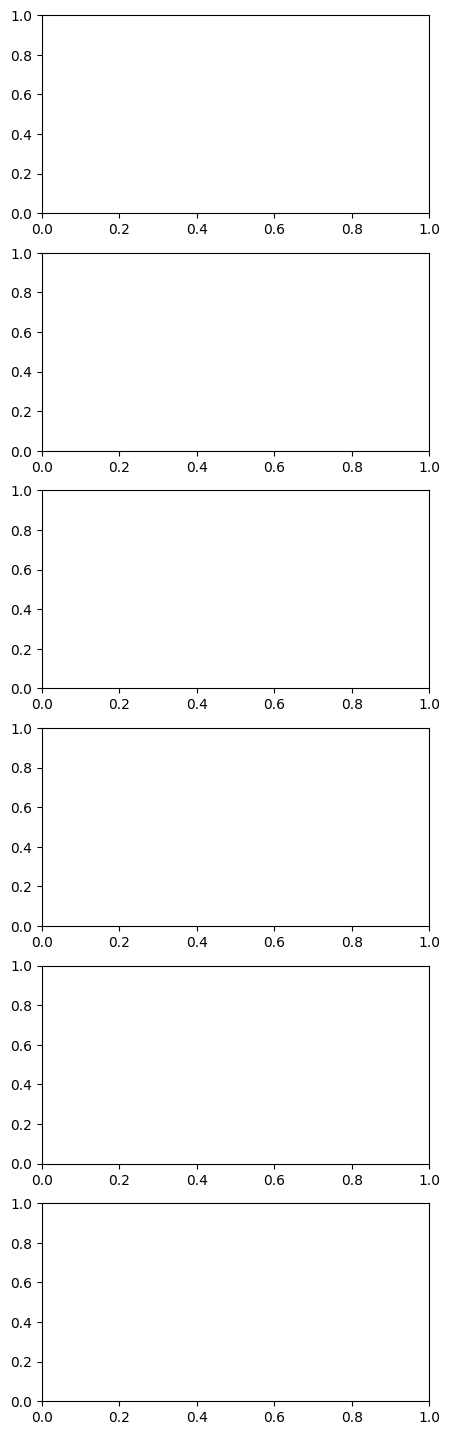

In [61]:
#this is a standard line from the demo but I don't know why there is an error
plot.plot_media_channel_posteriors(media_mix_model=mmm)

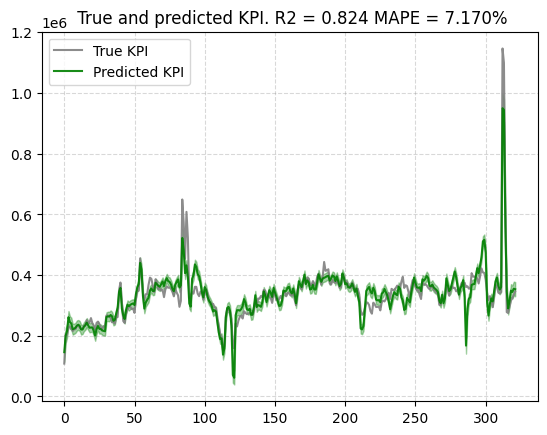

In [62]:
# Here is another example where we can pass the target scaler if you want the plot to be in the "not scaled scale"
plot.plot_model_fit(mmm, target_scaler=target_scaler)

In [63]:
# We have to scale the test media data if we have not done so before.
new_predictions = mmm.predict(media=media_scaler.transform(media_data_test),
                              seed=SEED)
new_predictions.shape

(2000, 60)

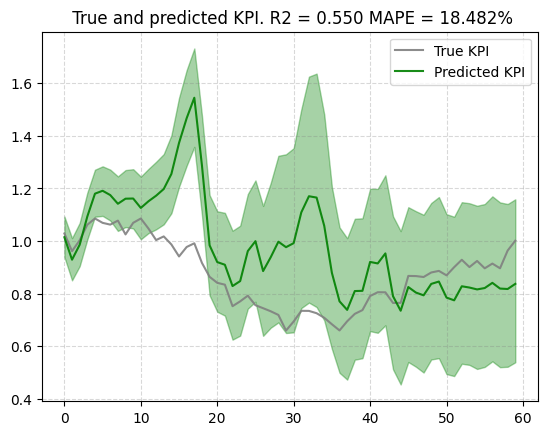

In [64]:
plot.plot_out_of_sample_model_fit(out_of_sample_predictions=new_predictions,
                                 out_of_sample_target=target_scaler.transform(target_test))

In [65]:
media_contribution, roi_hat = mmm.get_posterior_metrics(target_scaler=target_scaler, cost_scaler=cost_scaler)

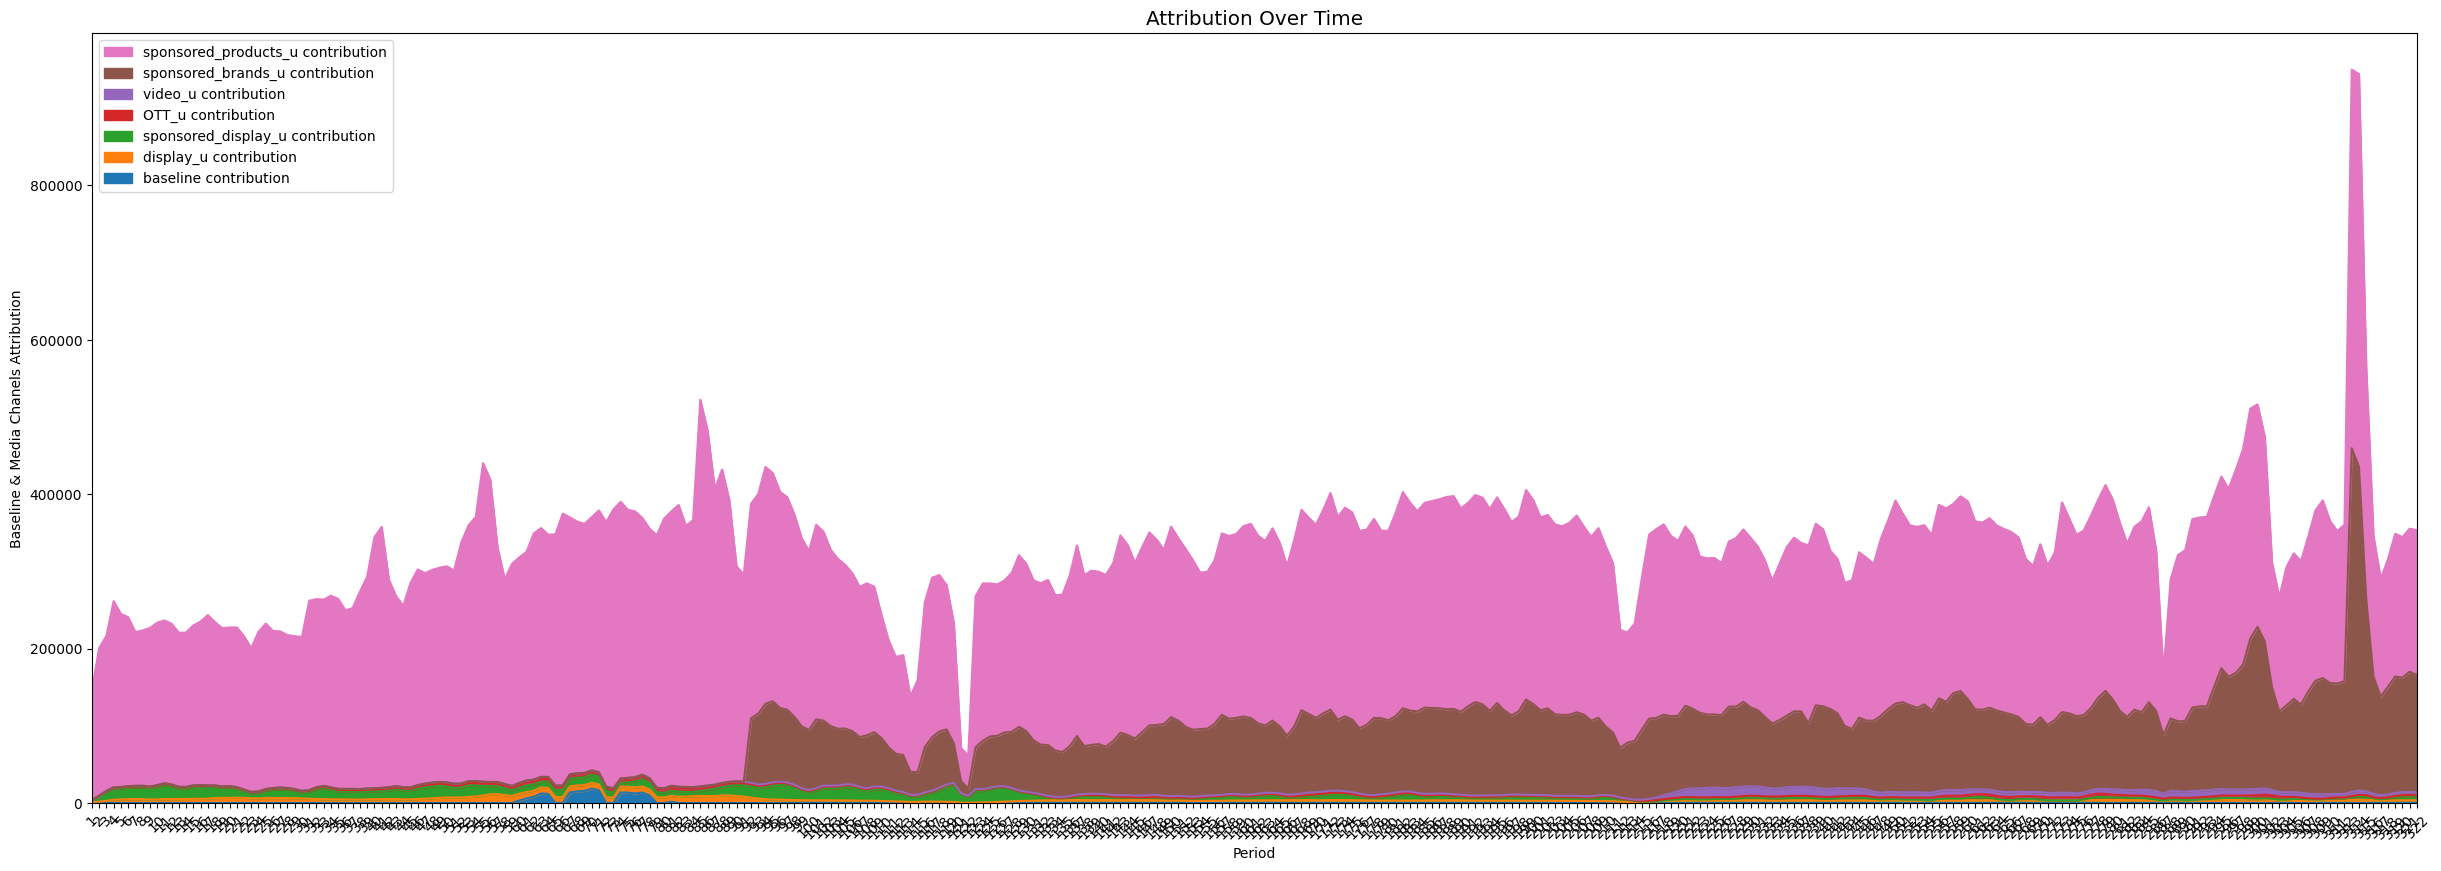

In [66]:
plot.plot_media_baseline_contribution_area_plot(media_mix_model=mmm,
                                                target_scaler=target_scaler,
                                                fig_size=(30,10))

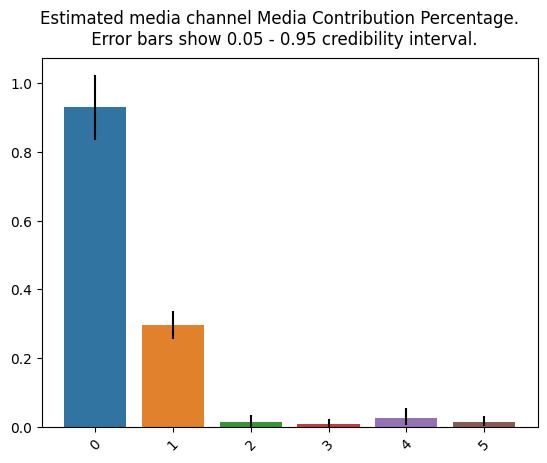

In [67]:
plot.plot_bars_media_metrics(metric=media_contribution, metric_name="Media Contribution Percentage")

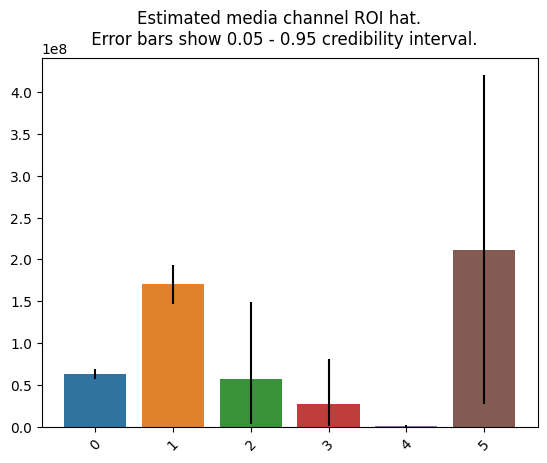

In [68]:
plot.plot_bars_media_metrics(metric=roi_hat, metric_name="ROI hat")  

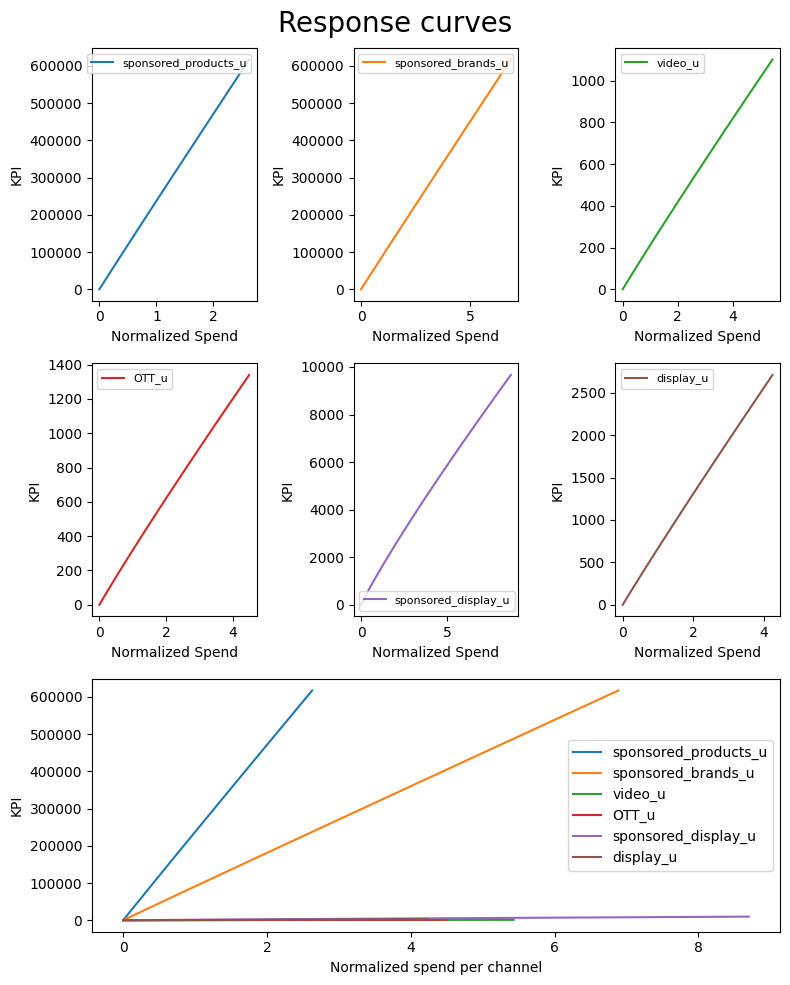

In [69]:
plot.plot_response_curves(
    media_mix_model=mmm, target_scaler=target_scaler, seed=SEED)

# Optimization

In [70]:
prices = costs
n_time_periods = 60
budget = jnp.sum(jnp.dot(prices, media_data.mean(axis=0)))* n_time_periods

In [71]:
# Run optimization with the parameters of choice.
# The default assumes that spending on each channel will only change by +/-20% max.
solution, kpi_without_optim, previous_media_allocation = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -26268594.988669023
            Iterations: 58
            Function evaluations: 756
            Gradient evaluations: 56


In [72]:
# Obtain the optimal weekly allocation.
optimal_buget_allocation = prices * solution.x
optimal_buget_allocation

Array([8.6151170e+06, 1.0353033e+06, 7.5193512e+05, 2.2950245e+06,
       1.3169874e+03, 5.7399775e+06], dtype=float32)

In [73]:
# similar renormalization to get previous budget allocation
previous_budget_allocation = prices * previous_media_allocation
previous_budget_allocation

Array([6.960881e+06, 8.358287e+05, 9.105867e+05, 2.779254e+06,
       1.063240e+03, 6.951061e+06], dtype=float32)

In [74]:
# Both these values should be very close in order to compare KPI
budget, optimal_buget_allocation.sum()

(Array(18438674., dtype=float32), Array(18438676., dtype=float32))

In [75]:
# Check budget constraint
# Both numbers should be almost equal
budget, jnp.sum(solution.x * prices)

(Array(18438674., dtype=float32), Array(18438676., dtype=float32))

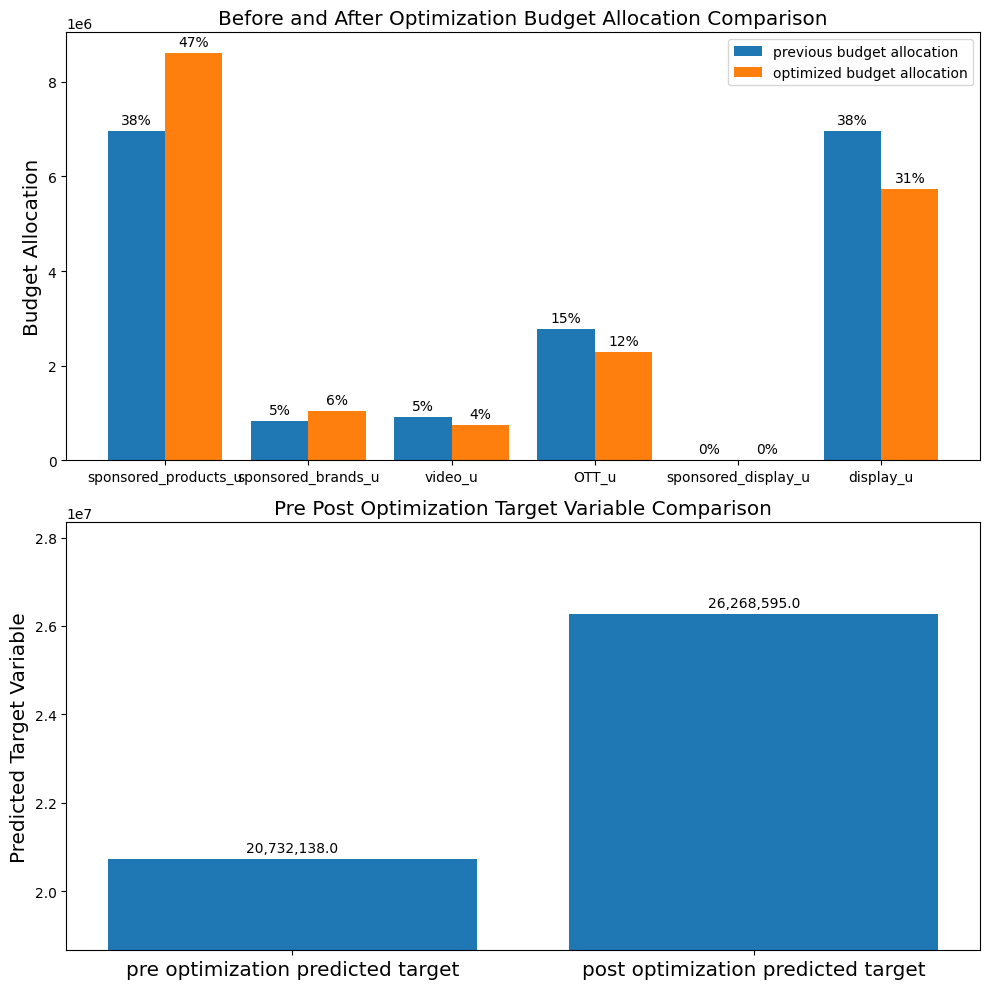

In [76]:
# Plot out pre post optimization budget allocation and predicted target variable comparison.
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution['fun'], 
                                                kpi_without_optim=kpi_without_optim,
                                                optimal_buget_allocation=optimal_buget_allocation, 
                                                previous_budget_allocation=previous_budget_allocation, 
                                                figure_size=(10,10))

In [77]:
# We can use the utilities for saving models to disk.
file_path = "media_mix_model.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)

In [39]:
# Once saved one can load the models.
loaded_mmm = utils.load_model(file_path=file_path)
loaded_mmm.trace["coef_media"].shape # Example of accessing any of the model values.

(2000, 3)

In [78]:
# Set lower and upper bounds to 1 so that spending on each channel can change by +/-100%
solution1, kpi_without_optim1, previous_media_allocation1 = optimize_media.find_optimal_budgets(
    n_time_periods=n_time_periods,
    media_mix_model=mmm,
    budget=budget,
    prices=prices,
    media_scaler=media_scaler,
    target_scaler=target_scaler,
    bounds_lower_pct = 1,
    bounds_upper_pct = 1,
    seed=SEED)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -45360785.89443466
            Iterations: 97
            Function evaluations: 1296
            Gradient evaluations: 95


In [79]:
optimal_buget_allocation1 = prices * solution1.x
optimal_buget_allocation1

Array([1.4370215e+07, 1.7255055e+06, 2.6825547e+05, 1.3382271e+02,
       2.1949790e+03, 2.0723692e+06], dtype=float32)

In [80]:
previous_budget_allocation1 = prices * previous_media_allocation1
previous_budget_allocation1

Array([6.960881e+06, 8.358287e+05, 9.105867e+05, 2.779254e+06,
       1.063240e+03, 6.951061e+06], dtype=float32)

In [81]:
budget, optimal_buget_allocation1.sum()

(Array(18438674., dtype=float32), Array(18438674., dtype=float32))

In [82]:
budget, jnp.sum(solution1.x * prices)

(Array(18438674., dtype=float32), Array(18438674., dtype=float32))

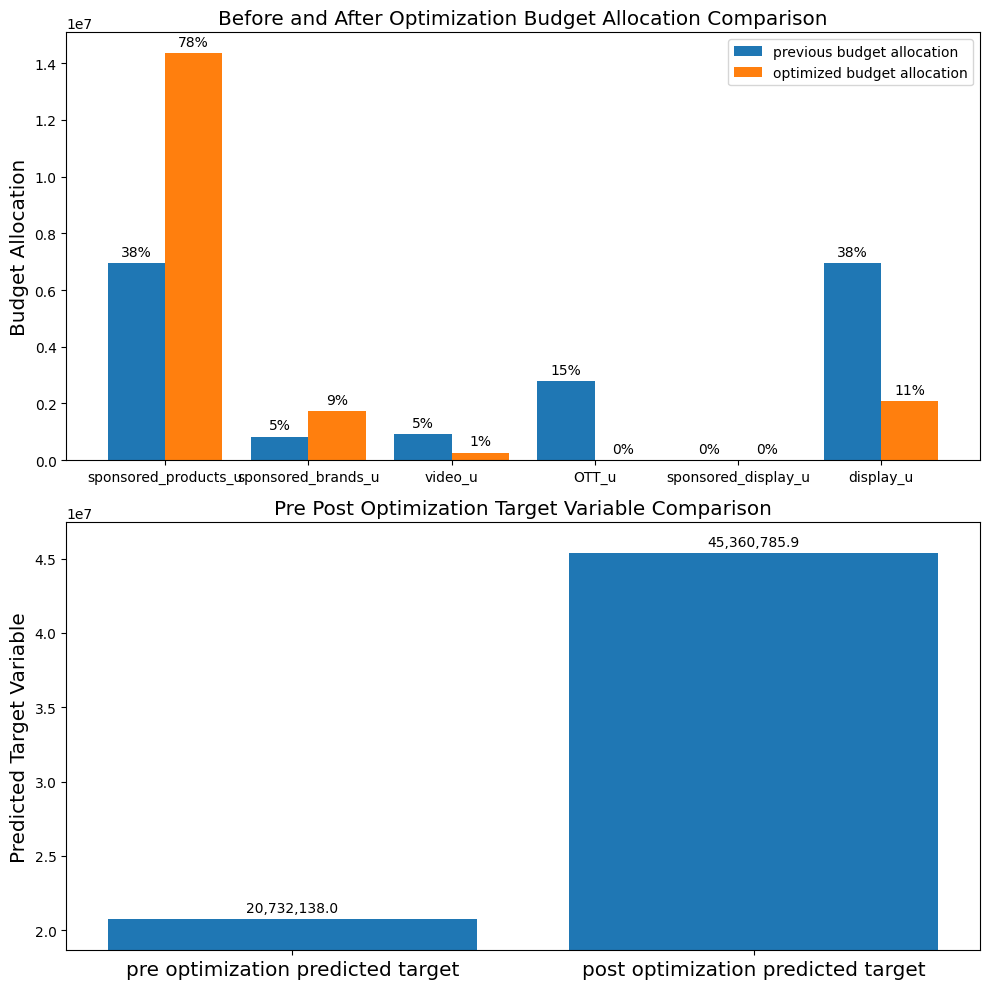

In [83]:
plot.plot_pre_post_budget_allocation_comparison(media_mix_model=mmm, 
                                                kpi_with_optim=solution1['fun'], 
                                                kpi_without_optim=kpi_without_optim1,
                                                optimal_buget_allocation=optimal_buget_allocation1, 
                                                previous_budget_allocation=previous_budget_allocation1, 
                                                figure_size=(10,10))

In [84]:
file_path = "media_mix_model1.pkl"
utils.save_model(media_mix_model=mmm, file_path=file_path)